# Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [182]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sagar\Downloads\bank_marketing_updated_v1.csv",skiprows=2)

In [183]:
df.rename(columns={
    'marital': 'marital_status', 
    'customerid': 'customer_id', 
    'jobedu': 'job_education'  # Add more as needed
}, inplace=True)
df.head()

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [184]:
# Shape
df.shape

(45211, 19)

In [185]:
print(df.describe())

        customer_id           age         salary        balance           day  \
count  45211.000000  45191.000000   45211.000000   45211.000000  45211.000000   
mean   22606.000000     40.935651   57006.171065    1362.272058     15.806419   
std    13051.435847     10.619198   32085.718415    3044.765829      8.322476   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11303.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22606.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000 

In [186]:
df.count()

customer_id       45211
age               45191
salary            45211
balance           45211
marital_status    45211
job_education     45211
targeted          45211
default           45211
housing           45211
loan              45211
contact           45211
day               45211
month             45161
duration          45211
campaign          45211
pdays             45211
previous          45211
poutcome          45211
response          45181
dtype: int64

In [187]:
df.isnull().sum()

customer_id        0
age               20
salary             0
balance            0
marital_status     0
job_education      0
targeted           0
default            0
housing            0
loan               0
contact            0
day                0
month             50
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response          30
dtype: int64

In [188]:
df['age'].fillna(df['age'].mean(), inplace=True)
df['month'].fillna(df['month'].mode()[0], inplace=True)
df['response'].fillna(df['response'].mode()[0], inplace=True)

In [189]:
df.isnull().sum()

customer_id       0
age               0
salary            0
balance           0
marital_status    0
job_education     0
targeted          0
default           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
response          0
dtype: int64

#  Inspect for any instances of missing values, outliers, or data inconsistencies.

In [190]:
# Define a function to detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in 'age', 'salary', and 'balance'
outliers_age = detect_outliers('age')
outliers_salary = detect_outliers('salary')
outliers_balance = detect_outliers('balance')

#  removal of outliers
df = df[~df.index.isin(outliers_age.index)]
df = df[~df.index.isin(outliers_salary.index)]
df = df[~df.index.isin(outliers_balance.index)]


In [191]:
#print(outliers_age)
print((outliers_age).count())

#print(outliers_age)
print((outliers_balance).count())

print((outliers_salary).count())

customer_id       487
age               487
salary            487
balance           487
marital_status    487
job_education     487
targeted          487
default           487
housing           487
loan              487
contact           487
day               487
month             487
duration          487
campaign          487
pdays             487
previous          487
poutcome          487
response          487
dtype: int64
customer_id       4729
age               4729
salary            4729
balance           4729
marital_status    4729
job_education     4729
targeted          4729
default           4729
housing           4729
loan              4729
contact           4729
day               4729
month             4729
duration          4729
campaign          4729
pdays             4729
previous          4729
poutcome          4729
response          4729
dtype: int64
customer_id       0
age               0
salary            0
balance           0
marital_status    0
job_education     0

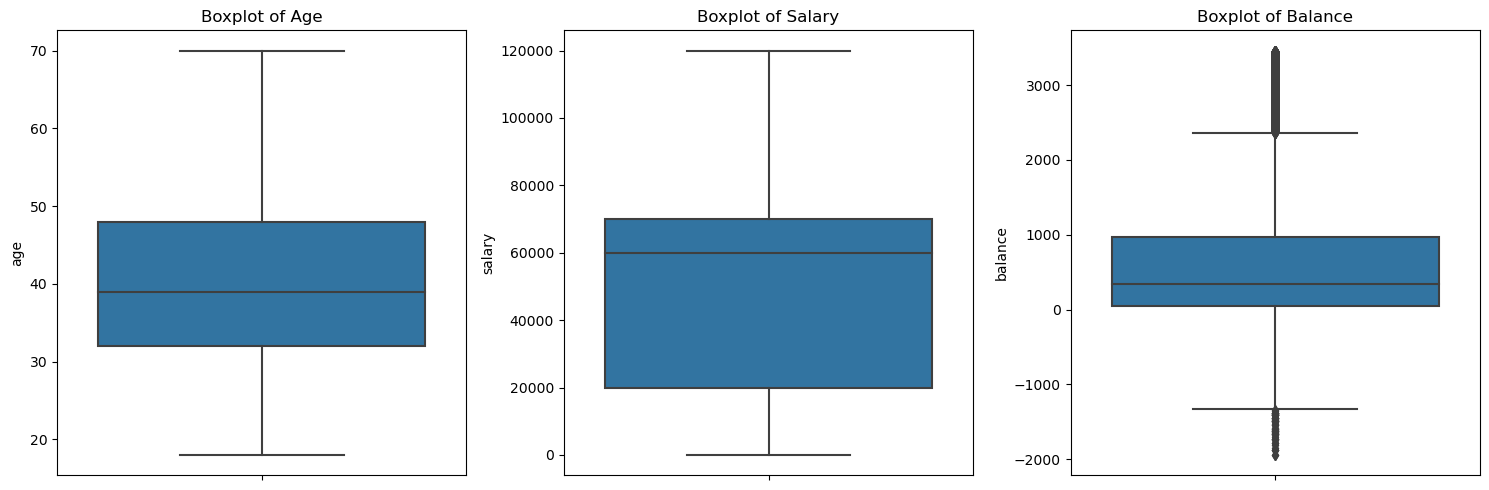

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(15, 5))

# Plot boxplot for 'age'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')

# Plot boxplot for 'salary'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['salary'])
plt.title('Boxplot of Salary')

# Plot boxplot for 'balance'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['balance'])
plt.title('Boxplot of Balance')

# Display the plots
plt.tight_layout()
plt.show()


In [193]:
df.count()


customer_id       40108
age               40108
salary            40108
balance           40108
marital_status    40108
job_education     40108
targeted          40108
default           40108
housing           40108
loan              40108
contact           40108
day               40108
month             40108
duration          40108
campaign          40108
pdays             40108
previous          40108
poutcome          40108
response          40108
dtype: int64

# Derive summary statistics (mean, median, standard deviation) for relevant columns.

In [194]:
# Calculate mean, median, and mode for 'age', 'balance', and 'salary'
statistics = {
    'Mean': df[['age', 'balance', 'salary','campaign']].mean(),
    'Median': df[['age', 'balance', 'salary','campaign']].median(),
    'stdev': df[['age', 'balance', 'salary','campaign']].std()}

# Convert to a DataFrame for easier display
statistics_df = pd.DataFrame(statistics)
print("Mean, Median, and stdev for 'age', 'balance','salary','campaign':")
print(statistics_df)


Mean, Median, and stdev for 'age', 'balance','salary','campaign':
                  Mean   Median         stdev
age          40.288068     39.0      9.890807
balance     636.025955    345.0    841.529411
salary    56548.169941  60000.0  32073.617361
campaign      2.780518      2.0      3.124493


In [195]:
# Assuming your original column is named 'time_in_seconds'
# Extract the numeric part and convert it to integer

df['time_in_seconds_only'] = df['duration'].str.extract('(\d+)').astype(float)

# Display the new column
print(df[['duration', 'time_in_seconds_only']])

                   duration  time_in_seconds_only
0                   261 sec                 261.0
1                   151 sec                 151.0
2                    76 sec                  76.0
3                    92 sec                  92.0
4                   198 sec                 198.0
...                     ...                   ...
45203  4.43333333333333 min                   4.0
45205  6.43333333333333 min                   6.0
45206  16.2833333333333 min                  16.0
45209  8.46666666666667 min                   8.0
45210  6.01666666666667 min                   6.0

[40108 rows x 2 columns]


In [196]:
df.drop(columns=['duration'], inplace=True)
df.head()

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,time_in_seconds_only
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",1,-1,0,unknown,no,76.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,92.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",1,-1,0,unknown,no,198.0


In [197]:
df.rename(columns={'time_in_seconds_only': 'Duration'}, inplace=True)
df.head()
df.count()

customer_id       40108
age               40108
salary            40108
balance           40108
marital_status    40108
job_education     40108
targeted          40108
default           40108
housing           40108
loan              40108
contact           40108
day               40108
month             40108
campaign          40108
pdays             40108
previous          40108
poutcome          40108
response          40108
Duration          40108
dtype: int64

In [198]:
df.head()

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,Duration
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",1,-1,0,unknown,no,76.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",1,-1,0,unknown,no,92.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",1,-1,0,unknown,no,198.0


In [199]:
# Calculate mean, median, and mode for 'age', 'balance', and 'salary'
statistics = {
    'Mean': df[['age', 'balance', 'salary','campaign','Duration']].mean(),
    'Median': df[['age', 'balance', 'salary','campaign','Duration']].median(),
    'stdev': df[['age', 'balance', 'salary','campaign','Duration']].std()}

# Convert to a DataFrame for easier display
statistics_df = pd.DataFrame(statistics)
print("Mean, Median, and stdev for 'age', 'balance','salary','campaign','Duration':")
print(statistics_df)

Mean, Median, and stdev for 'age', 'balance','salary','campaign','Duration':
                  Mean   Median         stdev
age          40.288068     39.0      9.890807
balance     636.025955    345.0    841.529411
salary    56548.169941  60000.0  32073.617361
campaign      2.780518      2.0      3.124493
Duration     84.905779      5.0    185.987677


# Examine the distribution of the target variable, indicating responses to the term deposit campaign.

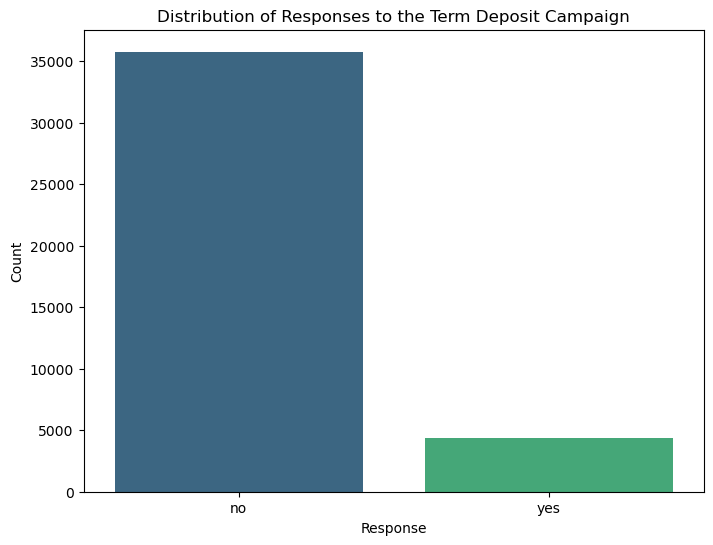

Counts of each response:
response
no     35752
yes     4356
Name: count, dtype: int64


In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category in the target variable 'response'
response_count = df['response'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=response_count.index, y=response_count.values, palette="viridis")
plt.title("Distribution of Responses to the Term Deposit Campaign")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

# Display numerical values for reference
print("Counts of each response:")
print(response_count)


# Examine the distribution of individual key features, such as age, balance, and call duration.

In [201]:
# Define a function to summarize key insights for each feature
def feature_insights(df, column_name):
    # Basic statistics
    mean = df[column_name].mean()
    median = df[column_name].median()
    std_dev = df[column_name].std()
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    
    # Calculate the count of outliers using IQR method
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_count = outliers.shape[0]

    # Skewness and Kurtosis
    skewness = df[column_name].skew()
    kurtosis = df[column_name].kurt()
    
    # Insights summary
    insights = {
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Minimum Value': min_value,
        'Maximum Value': max_value,
        'Outlier Count': outlier_count,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }
    
    return pd.Series(insights, name=column_name)

# Generate insights for 'age', 'balance', and 'duration'
age_insights = feature_insights(df, 'age')
balance_insights = feature_insights(df, 'balance')
duration_insights = feature_insights(df, 'Duration')

# Combine insights into a DataFrame for easier reading
insights_df = pd.DataFrame([age_insights, balance_insights, duration_insights])

# Display the insights
print("Key Insights for Age, Balance, and Call Duration:")
print(insights_df)
insights_df


Key Insights for Age, Balance, and Call Duration:
                Mean  Median  Standard Deviation  Minimum Value  \
age        40.288068    39.0            9.890807           18.0   
balance   636.025955   345.0          841.529411        -1944.0   
Duration   84.905779     5.0          185.987677            0.0   

          Maximum Value  Outlier Count  Skewness   Kurtosis  
age                70.0            0.0  0.430304  -0.650130  
balance          3462.0         2543.0  1.300415   1.348892  
Duration         3881.0         4627.0  4.562856  35.881919  


,Mean,Median,Standard Deviation,Minimum Value,Maximum Value,Outlier Count,Skewness,Kurtosis
age,40.288068,39.0,9.890807,18.0,70.0,0.0,0.430304,-0.650130
balance,636.025955,345.0,841.529411,-1944.0,3462.0,2543.0,1.300415,1.348892
Duration,84.905779,5.0,185.987677,0.0,3881.0,4627.0,4.562856,35.881919


# Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

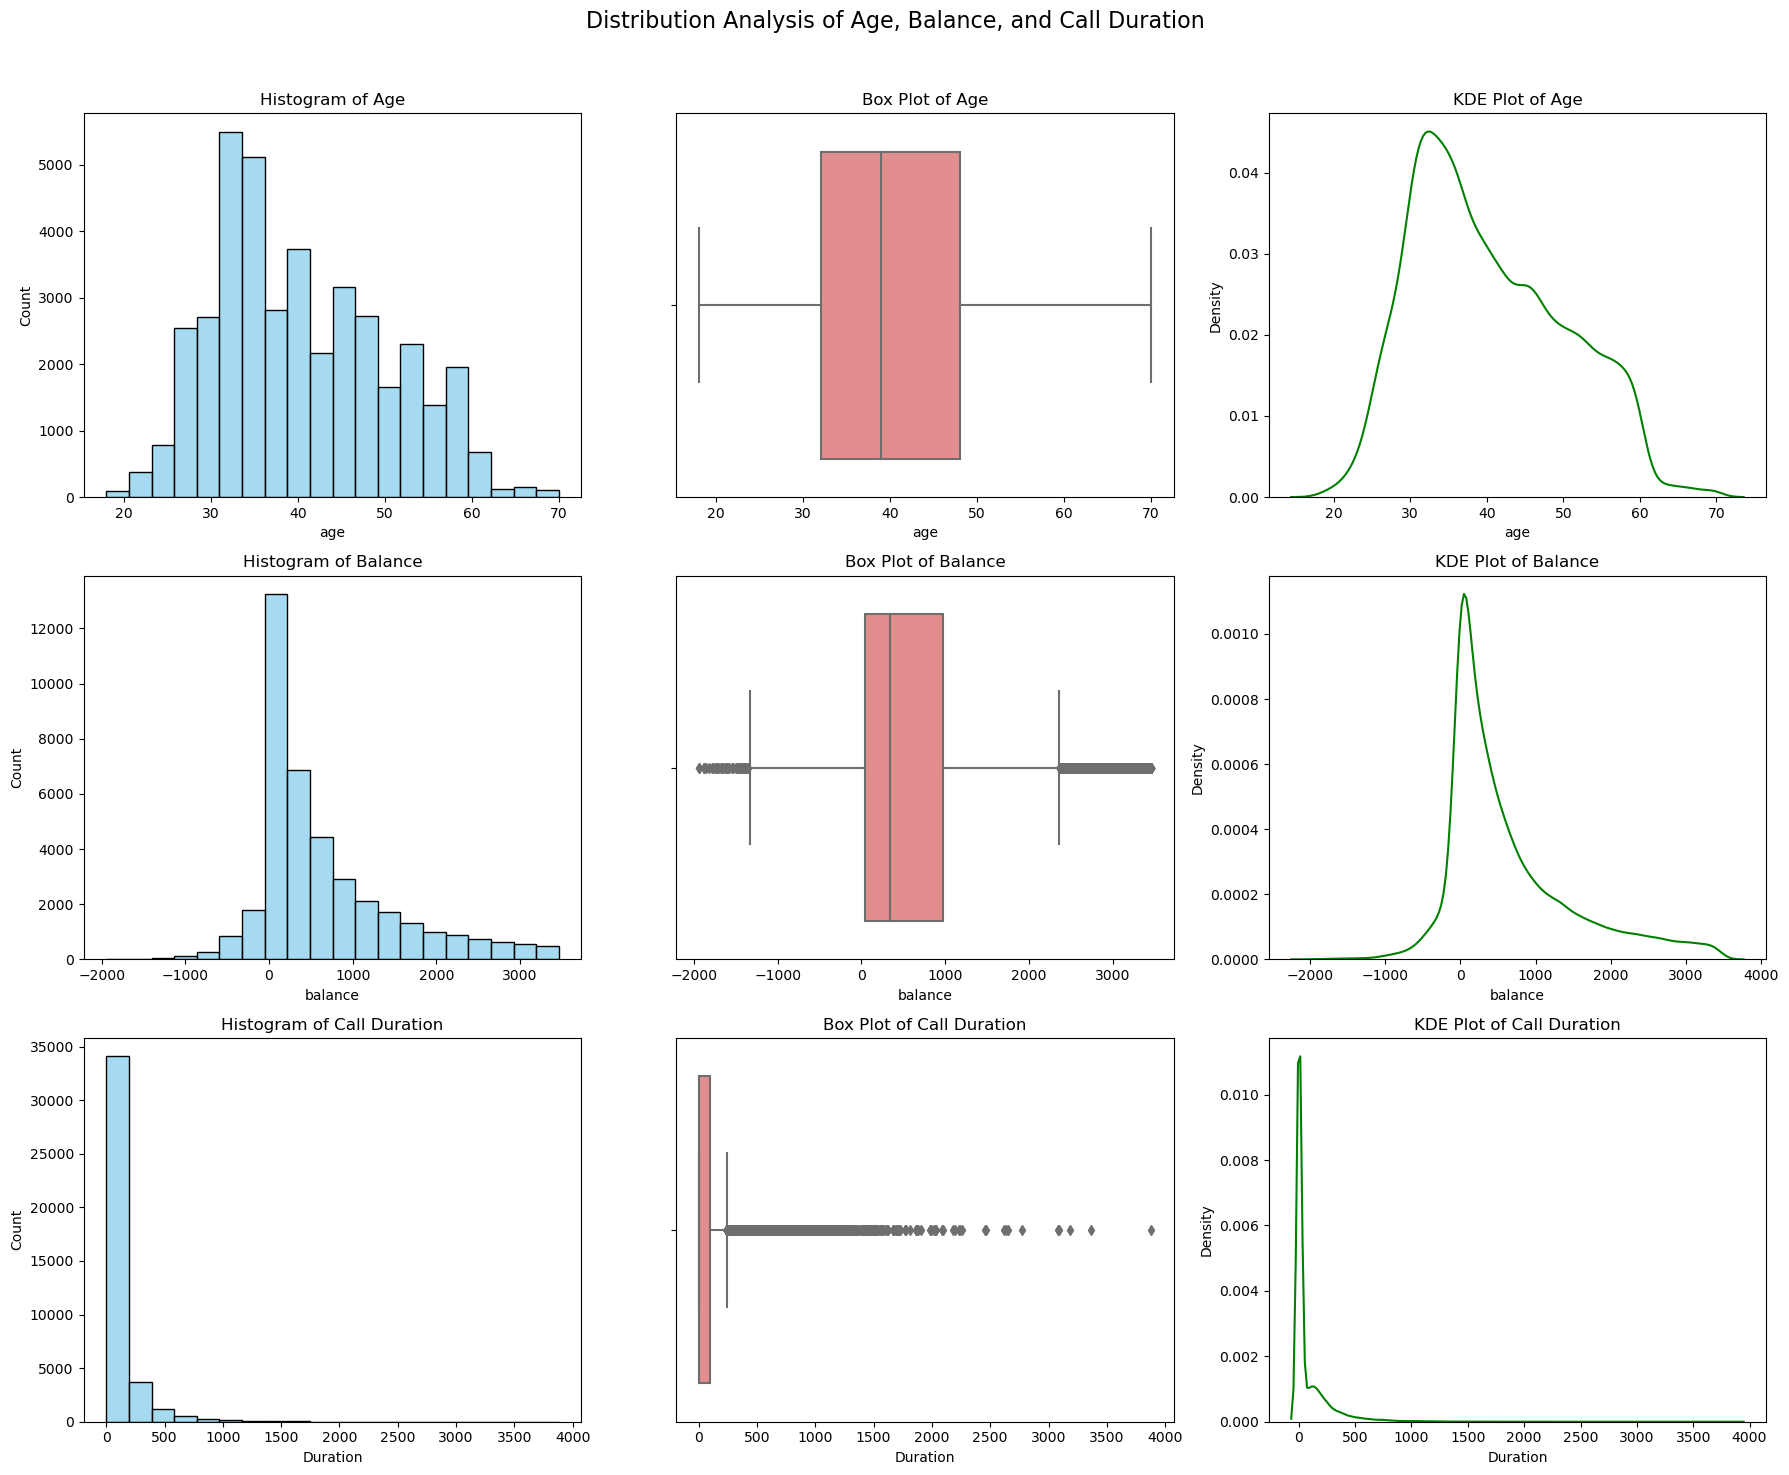

In [202]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with 3 rows for each feature
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution Analysis of Age, Balance, and Call Duration', fontsize=16)

# Plot for Age
# Histogram
sns.histplot(df['age'], bins=20, kde=False, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Histogram of Age")
# Box Plot
sns.boxplot(x=df['age'], ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Box Plot of Age")
# KDE Plot
sns.kdeplot(df['age'], ax=axes[0, 2], color="green")
axes[0, 2].set_title("KDE Plot of Age")

# Plot for Balance
# Histogram
sns.histplot(df['balance'], bins=20, kde=False, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Histogram of Balance")
# Box Plot
sns.boxplot(x=df['balance'], ax=axes[1, 1], color="lightcoral")
axes[1, 1].set_title("Box Plot of Balance")
# KDE Plot
sns.kdeplot(df['balance'], ax=axes[1, 2], color="green")
axes[1, 2].set_title("KDE Plot of Balance")

# Plot for Call Duration
# Histogram
sns.histplot(df['Duration'], bins=20, kde=False, ax=axes[2, 0], color="skyblue")
axes[2, 0].set_title("Histogram of Call Duration")
# Box Plot
sns.boxplot(x=df['Duration'], ax=axes[2, 1], color="lightcoral")
axes[2, 1].set_title("Box Plot of Call Duration")
# KDE Plot
sns.kdeplot(df['Duration'], ax=axes[2, 2], color="green")
axes[2, 2].set_title("KDE Plot of Call Duration")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()



In [203]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a temporary DataFrame by dropping specified columns
temp_df = df.drop(columns=['customer_id', 'marital_status'])

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column in the temporary DataFrame
for column in temp_df.select_dtypes(include=['object']).columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column])

# Ensure the 'response' column is numeric (if not already)
if temp_df['response'].dtype == 'object':
    temp_df['response'] = label_encoder.fit_transform(temp_df['response'])

# Calculate the correlation matrix
corr_matrix = temp_df.corr()

# Display the correlation with the target variable 'response', sorted in descending order
target_correlation = corr_matrix['response'].sort_values(ascending=False)
print(target_correlation)


response         1.000000
pdays            0.100476
previous         0.089138
balance          0.085411
Duration         0.047876
job_education    0.044054
salary           0.016270
age             -0.019573
default         -0.020666
month           -0.026976
day             -0.032830
loan            -0.062535
targeted        -0.066146
campaign        -0.070860
poutcome        -0.076770
housing         -0.128270
contact         -0.145834
Name: response, dtype: float64


In [179]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a temporary DataFrame by dropping specified columns
temp_df = df.drop(columns=['customer_id', 'marital_status'])

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column in the temporary DataFrame
for column in temp_df.select_dtypes(include=['object']).columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column])

# Ensure the 'response' column is numeric (if not already)
if temp_df['response'].dtype == 'object':
    temp_df['response'] = label_encoder.fit_transform(temp_df['response'])

# Calculate the correlation matrix
corr_matrix = temp_df.corr()

# Display the correlation with the target variable 'response', sorted in descending order
target_correlation = corr_matrix['response'].sort_values(ascending=False)
print(target_correlation)


response         1.000000
pdays            0.100476
previous         0.089138
balance          0.085411
Duration         0.047876
job_education    0.044054
salary           0.016270
age             -0.019573
default         -0.020666
month           -0.026976
day             -0.032830
loan            -0.062535
targeted        -0.066146
campaign        -0.070860
poutcome        -0.076770
housing         -0.128270
contact         -0.145834
Name: response, dtype: float64


In [127]:
# Split the 'jobedu' column into two new columns 'job' and 'education'
df[['job', 'education']] = df['job_education'].str.split(',', expand=True)

# Evaluate the relationship between independent variables and the target variable.

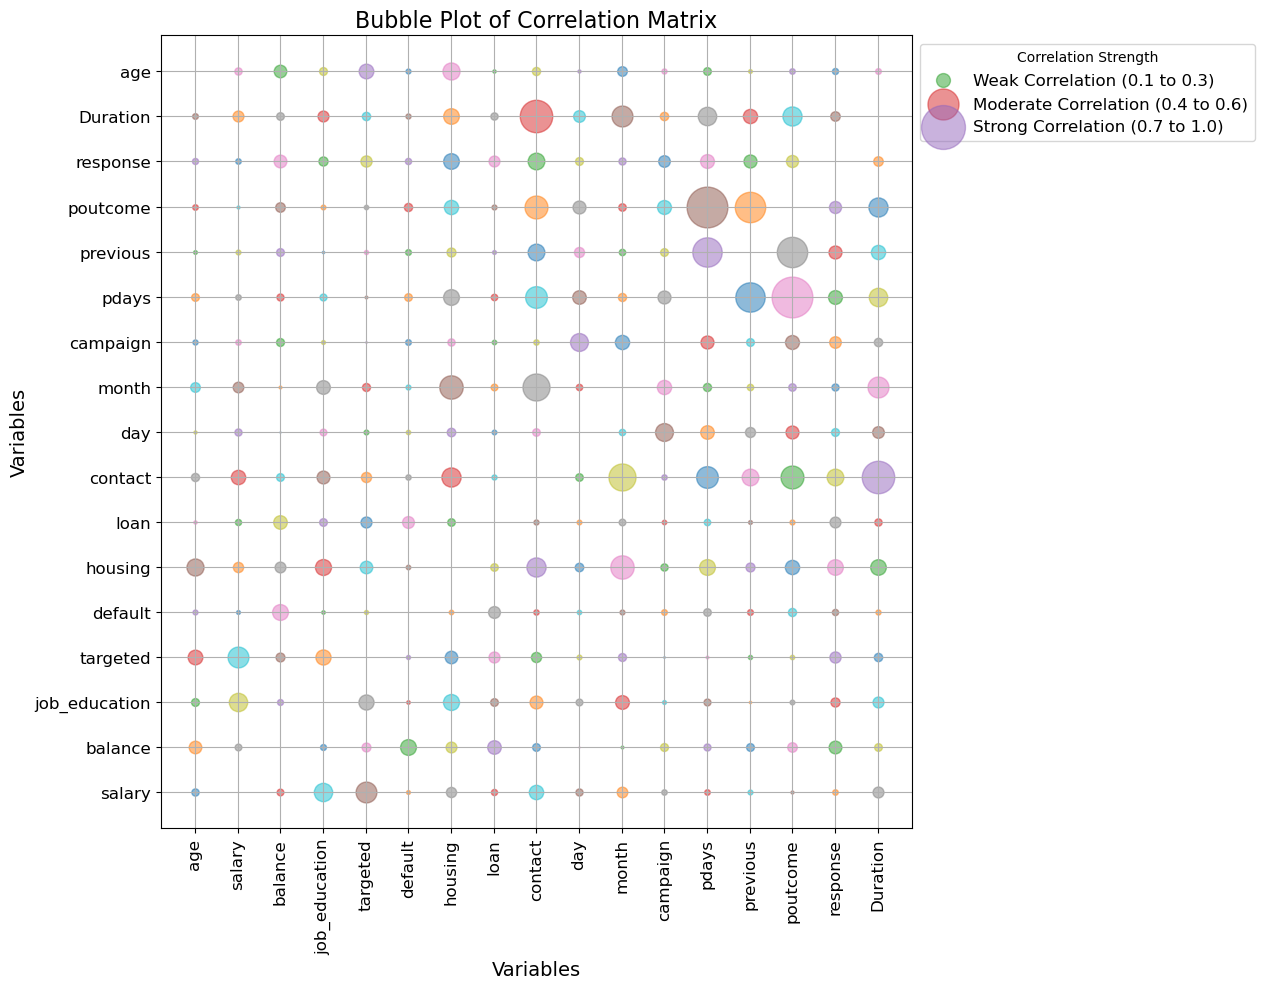

In [207]:
# Visualization
# Create a bubble plot for the correlation matrix
plt.figure(figsize=(15, 10))  # Increased figure size for better screen utilization
correlations = temp_df.corr()

# Create scatter plot with bubbles
for i in range(len(correlations.columns)):
    for j in range(len(correlations.columns)):
        if i != j:
            size = abs(correlations.iloc[i, j]) * 1000  # Size based on correlation strength
            plt.scatter(x=correlations.columns[i], y=correlations.columns[j],
                        s=size, alpha=0.5)

# Create custom legend for bubble sizes
sizes = [100, 500, 1000]  # Sizes for legend
labels = ['Weak Correlation (0.1 to 0.3)', 
          'Moderate Correlation (0.4 to 0.6)', 
          'Strong Correlation (0.7 to 1.0)']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size, alpha=0.5, label=label)

plt.title('Bubble Plot of Correlation Matrix', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.grid()

# Display the legend outside the plot
plt.legend(title='Correlation Strength', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make space for legend
plt.show()

# Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.

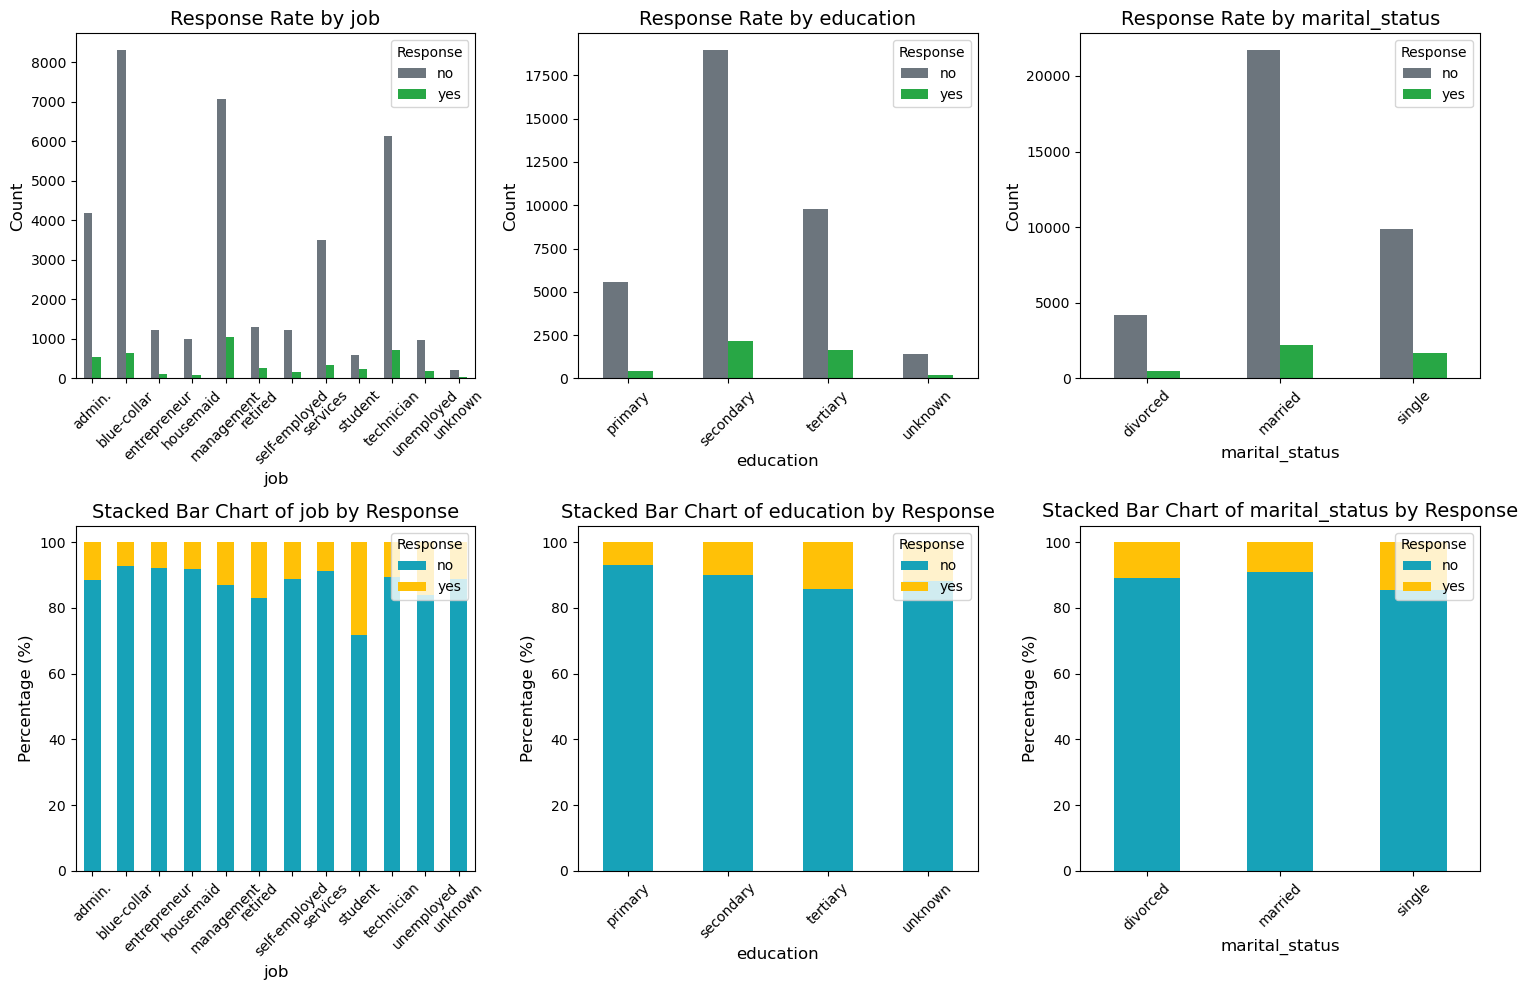

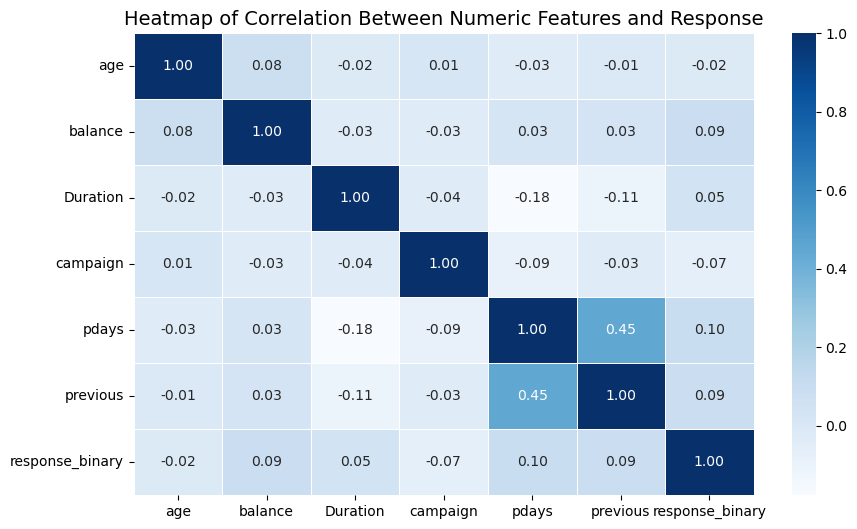

In [208]:
# Create response_binary column
df['response_binary'] = df['response'].map({'yes': 1, 'no': 0})

# Define categorical and numeric features
categorical_features = ['job', 'education', 'marital_status']
numeric_features = ['age', 'balance', 'Duration', 'campaign', 'pdays', 'previous']

# Set up the figure for bar charts and stacked bar charts
fig, axes = plt.subplots(2, len(categorical_features), figsize=(15, 10))

# 1. Bar Charts for Categorical Features
for i, feature in enumerate(categorical_features):
    counts = df.groupby([feature, 'response']).size().unstack(fill_value=0)
    counts.plot(kind='bar', ax=axes[0, i], color=['#6C757D', '#28A745'])  # Presentable colors
    axes[0, i].set_title(f'Response Rate by {feature}', fontsize=14)
    axes[0, i].set_xlabel(feature, fontsize=12)
    axes[0, i].set_ylabel('Count', fontsize=12)
    axes[0, i].legend(title='Response', fontsize=10)
    axes[0, i].tick_params(axis='x', rotation=45)

# 2. Stacked Bar Charts for Categorical Features
for i, feature in enumerate(categorical_features):
    crosstab_data = pd.crosstab(df[feature], df['response'], normalize='index') * 100
    crosstab_data.plot(kind='bar', stacked=True, ax=axes[1, i], color=['#17A2B8', '#FFC107'])  # Presentable colors
    axes[1, i].set_title(f'Stacked Bar Chart of {feature} by Response', fontsize=14)
    axes[1, i].set_xlabel(feature, fontsize=12)
    axes[1, i].set_ylabel('Percentage (%)', fontsize=12)
    axes[1, i].tick_params(axis='x', rotation=45)
    axes[1, i].legend(title='Response', fontsize=10, loc='upper right')

# Adjust layout for the bar charts
plt.tight_layout()
plt.show()

# 3. Heatmap for Numeric Features
numeric_columns = numeric_features + ['response_binary']
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Between Numeric Features and Response', fontsize=14)
plt.show()

# Investigate the distribution of categorical variables such as job type, education, and marital status.

          Variable       Category  Count  Percentage
0              job    blue-collar   8951   22.317243
1              job     management   8130   20.270270
2              job     technician   6850   17.078887
3              job         admin.   4723   11.775706
4              job       services   3843    9.581630
5              job        retired   1578    3.934377
6              job  self-employed   1385    3.453176
7              job   entrepreneur   1334    3.326020
8              job     unemployed   1150    2.867258
9              job      housemaid   1083    2.700209
10             job        student    839    2.091852
11             job        unknown    242    0.603371
12       education      secondary  21110   52.632891
13       education       tertiary  11419   28.470629
14       education        primary   5985   14.922210
15       education        unknown   1594    3.974269
16  marital_status        married  23925   59.651441
17  marital_status         single  11522   28.

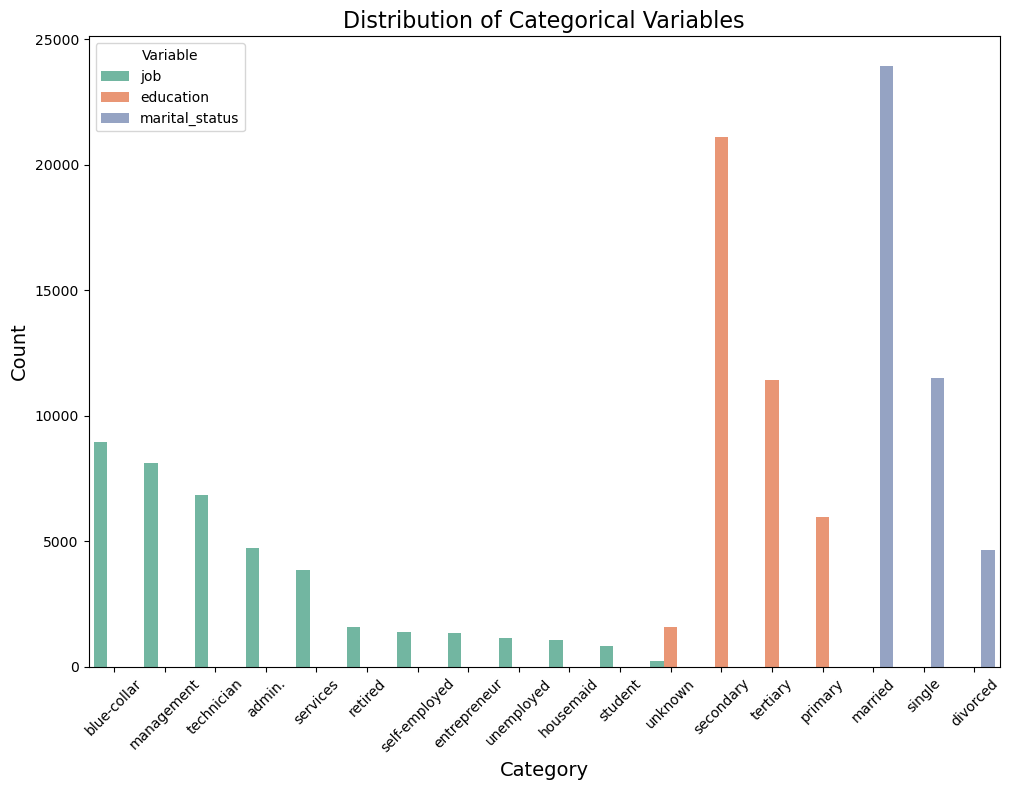

In [130]:
# Define categorical variables
categorical_variables = ['job', 'education', 'marital_status']

# Initialize a list to hold individual DataFrames
dataframes = []

# Calculate distribution for each categorical variable
for variable in categorical_variables:
    # Count occurrences
    counts = df[variable].value_counts()
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Combine counts and percentages into a DataFrame
    df_variable = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    df_variable['Variable'] = variable  # Add variable name for identification
    dataframes.append(df_variable)

# Concatenate all individual DataFrames into one
result = pd.concat(dataframes, ignore_index=True)

# Rearranging columns for better presentation
result = result[['Variable', 'Category', 'Count', 'Percentage']]
print(result)

# Plotting
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=result, x='Category', y='Count', hue='Variable', palette='Set2')

# Adding titles and labels
plt.title('Distribution of Categorical Variables', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for labels
plt.show()


# Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

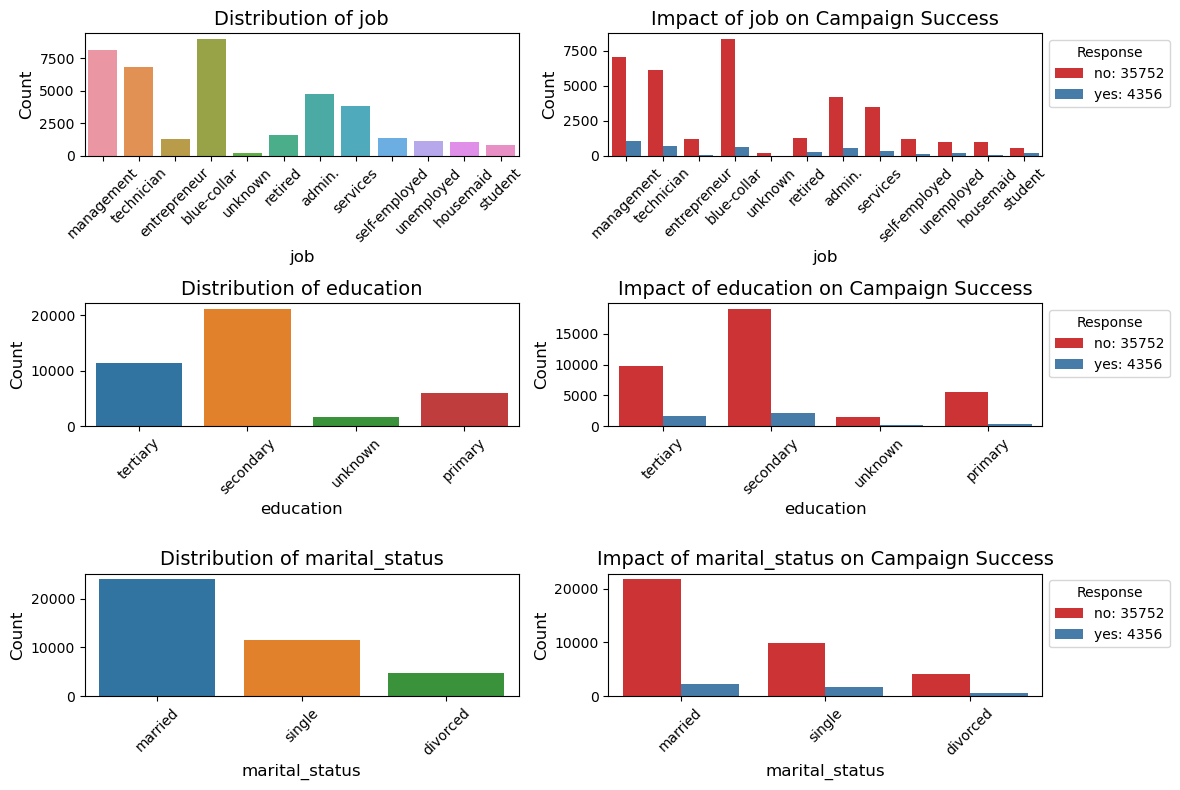

In [209]:
# Defining categorical variables to investigate
categorical_variables = ['job', 'education', 'marital_status']

# Plotting
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(14, 8))

# 1. Plot the distribution of each categorical variable
for i, feature in enumerate(categorical_variables):

# Distribution plot without hue
    sns.countplot(x=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i, 0].set_xlabel(feature, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)

# Impact on campaign success with hue
    bar_plot = sns.countplot(x=feature, hue='response', data=df, ax=axes[i, 1], palette='Set1')
    axes[i, 1].set_title(f'Impact of {feature} on Campaign Success', fontsize=14)
    axes[i, 1].set_xlabel(feature, fontsize=12)
    axes[i, 1].set_ylabel('Count', fontsize=12)
    axes[i, 1].tick_params(axis='x', rotation=45)

# Create a dictionary to hold counts for the legend
    response_counts = df.groupby(['response', feature]).size().unstack(fill_value=0)

# Prepare custom legend with counts
    custom_legend = []
    for response in response_counts.index:
        total_count = response_counts.loc[response].sum()
        custom_legend.append(f'{response}: {total_count}')

    # Adding a custom legend outside the plot
    axes[i, 1].legend(custom_legend, title='Response', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


Distribution of job:
blue-collar: 8951 (22.3%)
management: 8130 (20.3%)
technician: 6850 (17.1%)
admin.: 4723 (11.8%)
services: 3843 (9.6%)
retired: 1578 (3.9%)
self-employed: 1385 (3.5%)
entrepreneur: 1334 (3.3%)
unemployed: 1150 (2.9%)
housemaid: 1083 (2.7%)
student: 839 (2.1%)
unknown: 242 (0.6%)

Impact of job on Campaign Success:
job - admin.: 4177 (11.7%)
job - blue-collar: 8318 (23.3%)
job - entrepreneur: 1230 (3.4%)
job - housemaid: 995 (2.8%)
job - management: 7071 (19.8%)
job - retired: 1310 (3.7%)
job - self-employed: 1230 (3.4%)
job - services: 3505 (9.8%)
job - student: 602 (1.7%)
job - technician: 6134 (17.2%)
job - unemployed: 965 (2.7%)
job - unknown: 215 (0.6%)
job - admin.: 546 (12.5%)
job - blue-collar: 633 (14.5%)
job - entrepreneur: 104 (2.4%)
job - housemaid: 88 (2.0%)
job - management: 1059 (24.3%)
job - retired: 268 (6.2%)
job - self-employed: 155 (3.6%)
job - services: 338 (7.8%)
job - student: 237 (5.4%)
job - technician: 716 (16.4%)
job - unemployed: 185 (4.

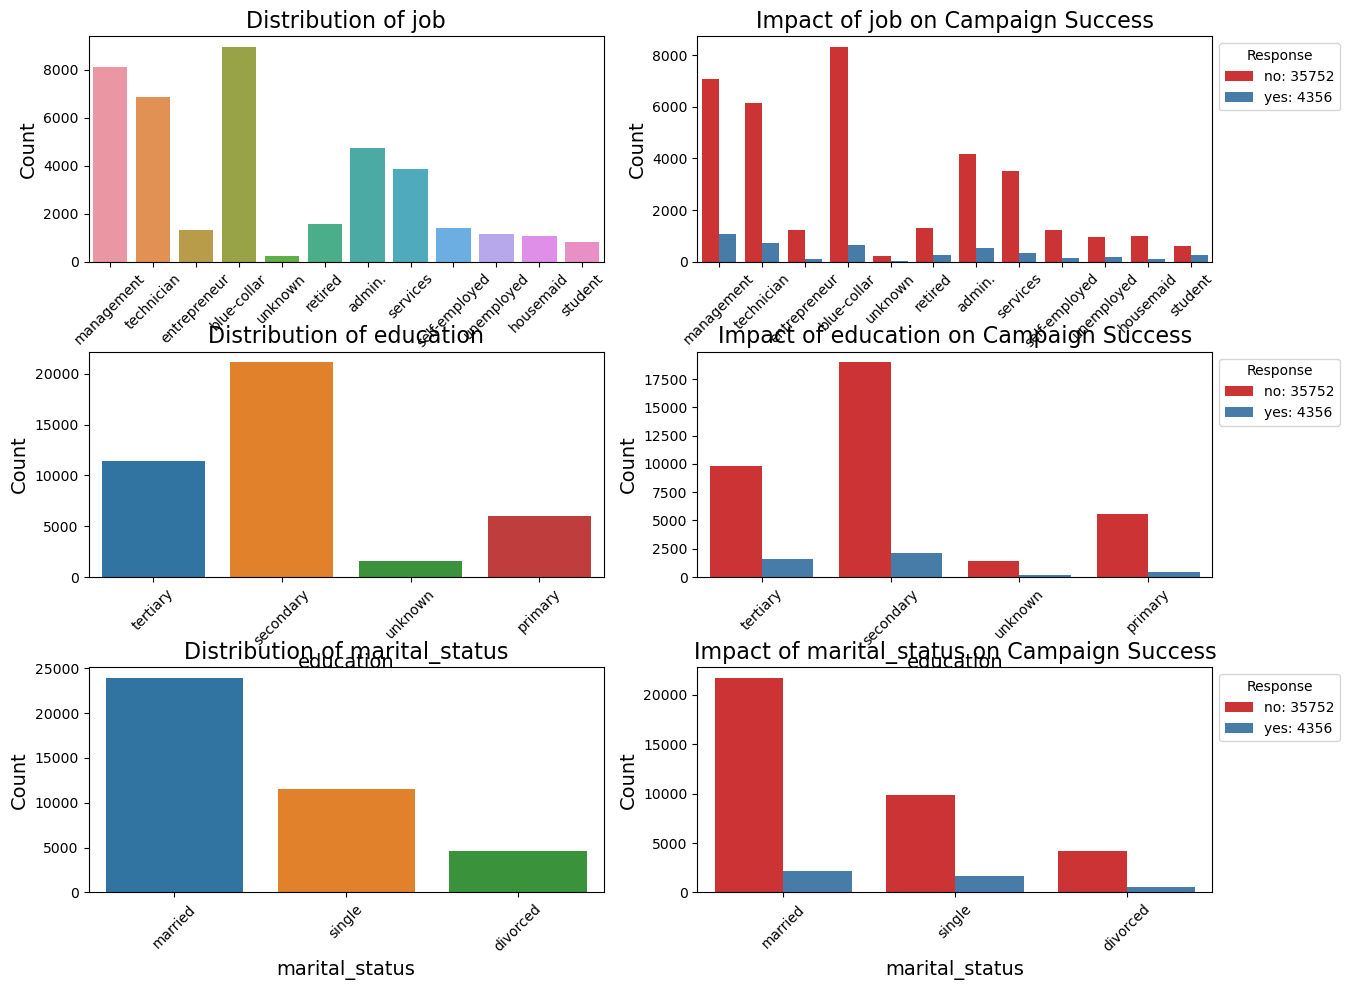

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining categorical variables to investigate
categorical_variables = ['job', 'education', 'marital_status']

# Plotting
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(16, 10))

# 1. Plot the distribution of each categorical variable
for i, feature in enumerate(categorical_variables):
    # Distribution plot without hue
    sns.countplot(x=feature, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}', fontsize=16)
    axes[i, 0].set_xlabel(feature, fontsize=14)
    axes[i, 0].set_ylabel('Count', fontsize=14)
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Calculate total counts for percentages
    total_counts = df[feature].value_counts()
    total = total_counts.sum()

    # Print counts and percentages for distribution plot
    print(f"\nDistribution of {feature}:")
    for category, count in total_counts.items():
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.1f}%)")

    # Impact on campaign success with hue
    bar_plot = sns.countplot(x=feature, hue='response', data=df, ax=axes[i, 1], palette='Set1')
    axes[i, 1].set_title(f'Impact of {feature} on Campaign Success', fontsize=16)
    axes[i, 1].set_xlabel(feature, fontsize=14)
    axes[i, 1].set_ylabel('Count', fontsize=14)
    axes[i, 1].tick_params(axis='x', rotation=45)

    # Create a dictionary to hold counts for the legend
    response_counts = df.groupby(['response', feature]).size().unstack(fill_value=0)

    # Prepare custom legend with counts
    custom_legend = []
    for response in response_counts.index:
        total_count = response_counts.loc[response].sum()
        custom_legend.append(f'{response}: {total_count}')

    # Adding a custom legend outside the plot
    axes[i, 1].legend(custom_legend, title='Response', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

    # Calculate total counts for percentages in impact plot
    total_counts = response_counts.sum(axis=1)

    # Print counts and percentages for impact plot
    print(f"\nImpact of {feature} on Campaign Success:")
    for j in range(len(response_counts)):
        for k in range(len(response_counts.columns)):
            count = response_counts.iloc[j, k]
            if count > 0:
                response = response_counts.columns[k]
                percentage = (count / total_counts[j]) * 100
                print(f"{feature} - {response}: {count} ({percentage:.1f}%)")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.subplots_adjust(hspace=0.4)  # Added space between rows of subplots
plt.show()



In [211]:
df

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,...,month,campaign,pdays,previous,poutcome,response,Duration,job,education,response_binary
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",1,-1,0,unknown,no,261.0,management,tertiary,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",1,-1,0,unknown,no,151.0,technician,secondary,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",1,-1,0,unknown,no,76.0,entrepreneur,secondary,0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",1,-1,0,unknown,no,92.0,blue-collar,unknown,0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,"may, 2017",1,-1,0,unknown,no,198.0,unknown,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,45204,23.0,4000,113,single,"student,tertiary",no,no,no,no,...,"nov, 2017",1,-1,0,unknown,yes,4.0,student,tertiary,1
45205,45206,25.0,60000,505,single,"technician,secondary",yes,no,no,yes,...,"nov, 2017",2,-1,0,unknown,yes,6.0,technician,secondary,1
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,"nov, 2017",3,-1,0,unknown,yes,16.0,technician,tertiary,1
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,"nov, 2017",4,-1,0,unknown,no,8.0,blue-collar,secondary,0


# Investigate temporal patterns in the success of the campaign over time.

Monthly Success Rates:
response  year month_abbr     no  yes  Success Rate (%)
0         2017        Apr   2076  471         18.492344
1         2017        Aug   4935  580         10.516772
2         2017        Dec     91   73         44.512195
3         2017        Feb   2012  352         14.890017
4         2017        Jan   1191  113          8.665644
5         2017        Jul   5861  553          8.621765
6         2017        Jun   4169  479         10.305508
7         2017        Mar    177  188         51.506849
8         2017        May  11928  813          6.380975
9         2017        Nov   2751  295          9.684833
10        2017        Oct    319  234         42.314647
11        2017        Sep    242  205         45.861298


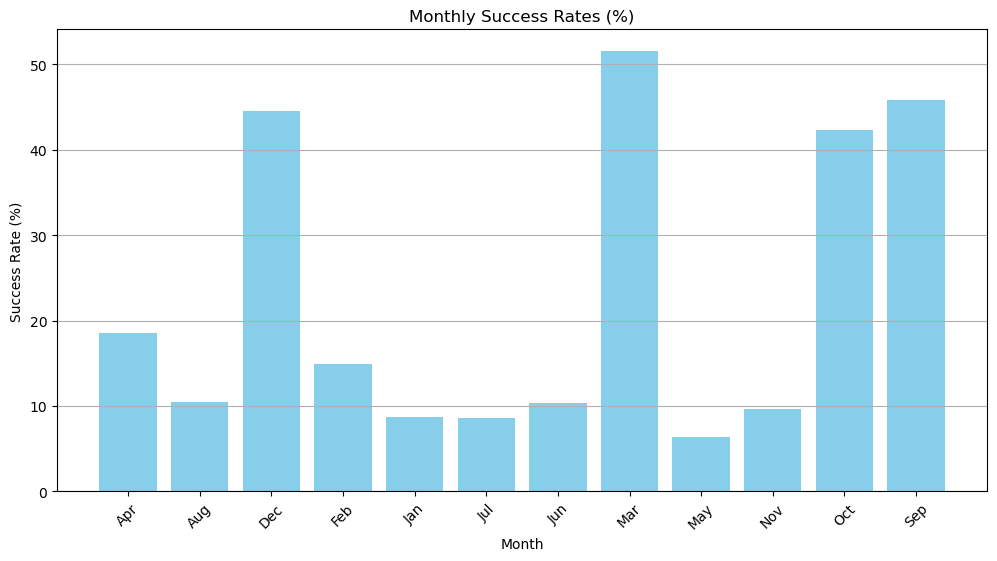

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract month and year
df['month'] = pd.to_datetime(df['month'], format='%b, %Y', errors='coerce')
df['year'] = df['month'].dt.year
df['month_abbr'] = df['month'].dt.strftime('%b')

# Calculate success rate by month
monthly_counts = df.groupby(['year', 'month_abbr', 'response']).size().unstack(fill_value=0)
monthly_counts['Success Rate (%)'] = (monthly_counts['yes'] / (monthly_counts['yes'] + monthly_counts['no'])) * 100
monthly_counts = monthly_counts.reset_index()

# Display the table
print("Monthly Success Rates:")
print(monthly_counts)

# Plotting the success rates
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month_abbr'], monthly_counts['Success Rate (%)'], color='skyblue')
plt.title('Monthly Success Rates (%)')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



# Analyze if specific months or days exhibit superior campaign performance

Monthly Success Rates:
response month_abbr     no  yes  Success Rate (%)
0               Apr   2076  471         18.492344
1               Aug   4935  580         10.516772
2               Dec     91   73         44.512195
3               Feb   2012  352         14.890017
4               Jan   1191  113          8.665644
5               Jul   5861  553          8.621765
6               Jun   4169  479         10.305508
7               Mar    177  188         51.506849
8               May  11928  813          6.380975
9               Nov   2751  295          9.684833
10              Oct    319  234         42.314647
11              Sep    242  205         45.861298

Day-of-Week Success Rates:
response day_of_week     no  yes  Success Rate (%)
0             Monday  11928  813          6.380975
1            Tuesday   4935  580         10.516772
2          Wednesday   4940  835         14.458874
3           Thursday   4169  479         10.305508
4             Friday    333  278         45.

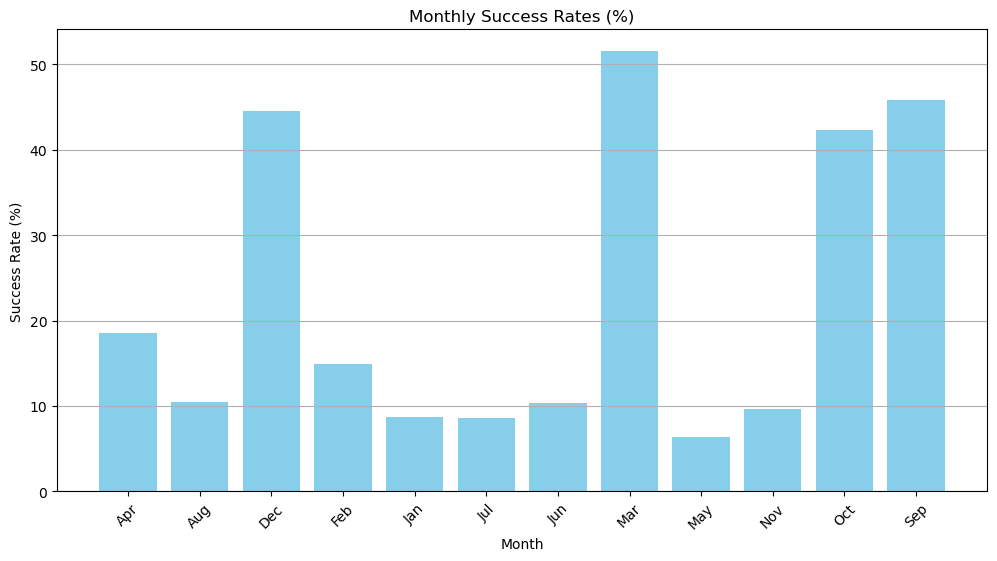

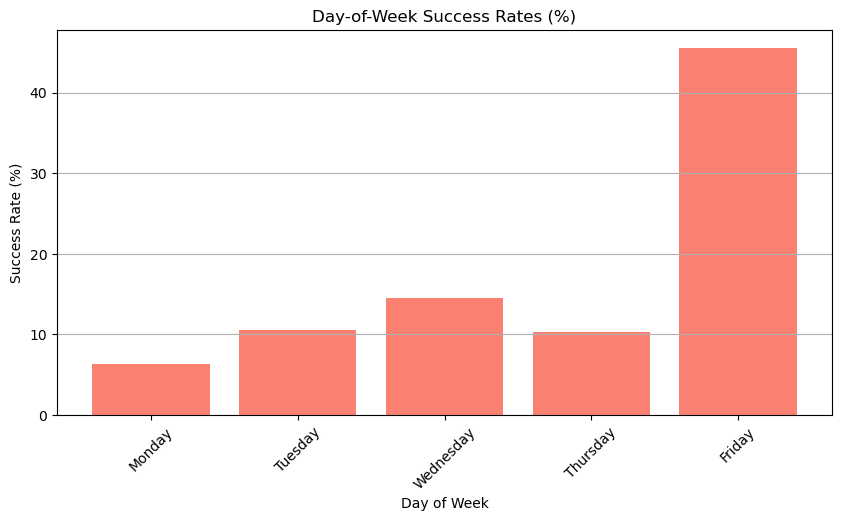

In [213]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the month to datetime format if it's in text (e.g., "may, 2017") and extract month and year
df['month'] = pd.to_datetime(df['month'], format='%b, %Y', errors='coerce')
df['month_abbr'] = df['month'].dt.strftime('%b')
df['day_of_week'] = pd.to_datetime(df['month']).dt.day_name()  # Extract the day of the week from month

# Calculate monthly success rate
monthly_counts = df.groupby(['month_abbr', 'response']).size().unstack(fill_value=0)
monthly_counts['Success Rate (%)'] = (monthly_counts['yes'] / (monthly_counts['yes'] + monthly_counts['no'])) * 100
monthly_counts = monthly_counts.reset_index()

# Calculate day-of-week success rate
day_counts = df.groupby(['day_of_week', 'response']).size().unstack(fill_value=0)
day_counts['Success Rate (%)'] = (day_counts['yes'] / (day_counts['yes'] + day_counts['no'])) * 100
day_counts = day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).reset_index()  # Order days

# Display the tables
print("Monthly Success Rates:")
print(monthly_counts)

print("\nDay-of-Week Success Rates:")
print(day_counts)

# Plotting Monthly Success Rates
plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['month_abbr'], monthly_counts['Success Rate (%)'], color='skyblue')
plt.title('Monthly Success Rates (%)')
plt.xlabel('Month')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plotting Day-of-Week Success Rates
plt.figure(figsize=(10, 5))
plt.bar(day_counts['day_of_week'], day_counts['Success Rate (%)'], color='salmon')
plt.title('Day-of-Week Success Rates (%)')
plt.xlabel('Day of Week')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [214]:
df

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,...,previous,poutcome,response,Duration,job,education,response_binary,year,month_abbr,day_of_week
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,0,unknown,no,261.0,management,tertiary,0,2017,May,Monday
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,0,unknown,no,151.0,technician,secondary,0,2017,May,Monday
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,0,unknown,no,76.0,entrepreneur,secondary,0,2017,May,Monday
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,0,unknown,no,92.0,blue-collar,unknown,0,2017,May,Monday
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,0,unknown,no,198.0,unknown,unknown,0,2017,May,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,45204,23.0,4000,113,single,"student,tertiary",no,no,no,no,...,0,unknown,yes,4.0,student,tertiary,1,2017,Nov,Wednesday
45205,45206,25.0,60000,505,single,"technician,secondary",yes,no,no,yes,...,0,unknown,yes,6.0,technician,secondary,1,2017,Nov,Wednesday
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,0,unknown,yes,16.0,technician,tertiary,1,2017,Nov,Wednesday
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,0,unknown,no,8.0,blue-collar,secondary,0,2017,Nov,Wednesday


# Introduce new features that may enhance prediction, such as creating age groups or income categories & Apply encoding techniques to transform categorical variables if necessary.

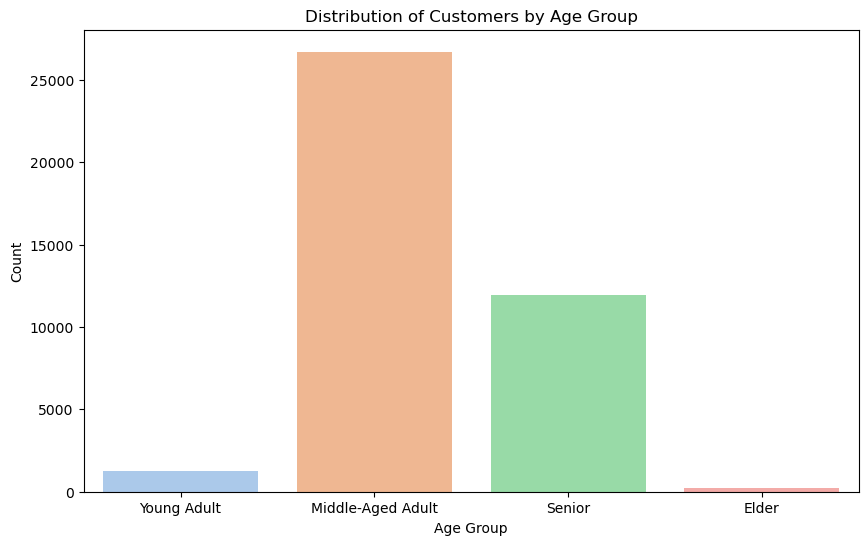

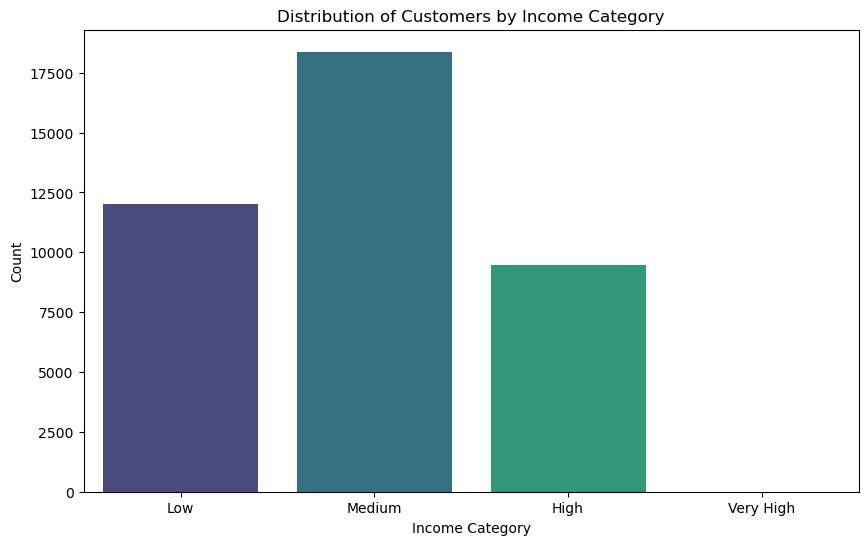

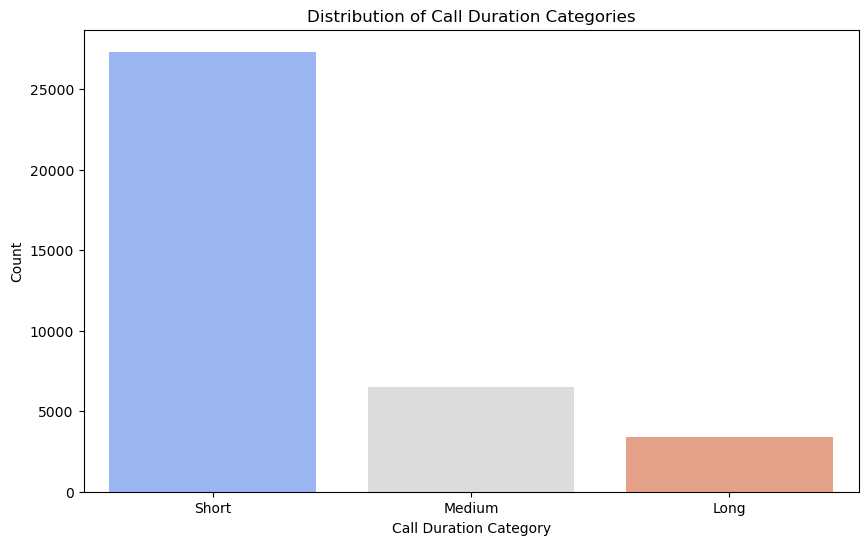

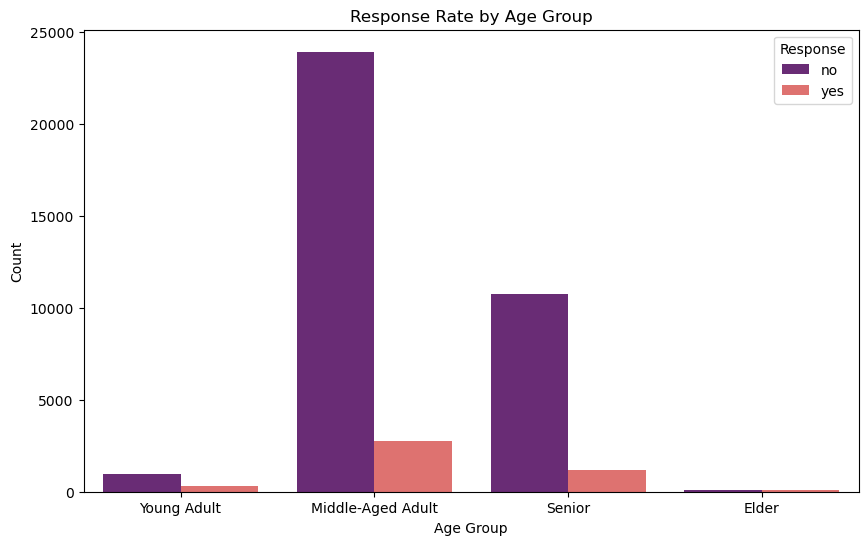

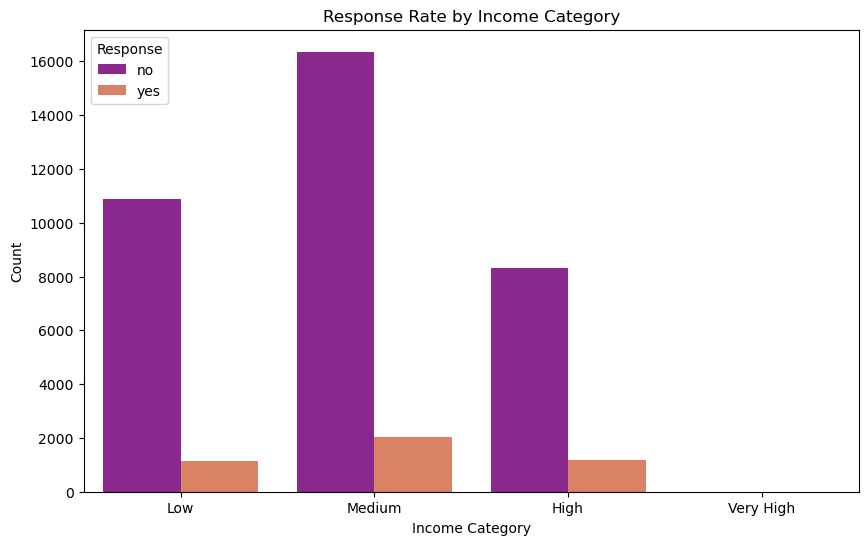

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create age groups
bins_age = [0, 25, 45, 65, 100]
labels_age = ['Young Adult', 'Middle-Aged Adult', 'Senior', 'Elder']
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)

# Create income categories
bins_salary = [0, 30000, 70000, 120000, float('inf')]
labels_salary = ['Low', 'Medium', 'High', 'Very High']
df['income_category'] = pd.cut(df['salary'], bins=bins_salary, labels=labels_salary)

# Create duration categories for call duration
bins_duration = [0, 100, 300, float('inf')]
labels_duration = ['Short', 'Medium', 'Long']
df['duration_category'] = pd.cut(df['Duration'], bins=bins_duration, labels=labels_duration)

# Plotting Age Groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='pastel')
plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Plotting Income Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', data=df, palette='viridis')
plt.title('Distribution of Customers by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Plotting Duration Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='duration_category', data=df, palette='coolwarm')
plt.title('Distribution of Call Duration Categories')
plt.xlabel('Call Duration Category')
plt.ylabel('Count')
plt.show()

# Plotting Age Group vs Response
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='response', data=df, palette='magma')
plt.title('Response Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

# Plotting Income Category vs Response
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', hue='response', data=df, palette='plasma')
plt.title('Response Rate by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()



In [216]:

df

,customer_id,age,salary,balance,marital_status,job_education,targeted,default,housing,loan,...,Duration,job,education,response_binary,year,month_abbr,day_of_week,age_group,income_category,duration_category
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261.0,management,tertiary,0,2017,May,Monday,Senior,High,Medium
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151.0,technician,secondary,0,2017,May,Monday,Middle-Aged Adult,Medium,Medium
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76.0,entrepreneur,secondary,0,2017,May,Monday,Middle-Aged Adult,High,Short
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92.0,blue-collar,unknown,0,2017,May,Monday,Senior,Low,Short
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,198.0,unknown,unknown,0,2017,May,Monday,Middle-Aged Adult,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,45204,23.0,4000,113,single,"student,tertiary",no,no,no,no,...,4.0,student,tertiary,1,2017,Nov,Wednesday,Young Adult,Low,Short
45205,45206,25.0,60000,505,single,"technician,secondary",yes,no,no,yes,...,6.0,technician,secondary,1,2017,Nov,Wednesday,Young Adult,Medium,Short
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,...,16.0,technician,tertiary,1,2017,Nov,Wednesday,Senior,Medium,Short
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,8.0,blue-collar,secondary,0,2017,Nov,Wednesday,Senior,Low,Short


# Examine correlations between independent variables to identify multicollinearity.

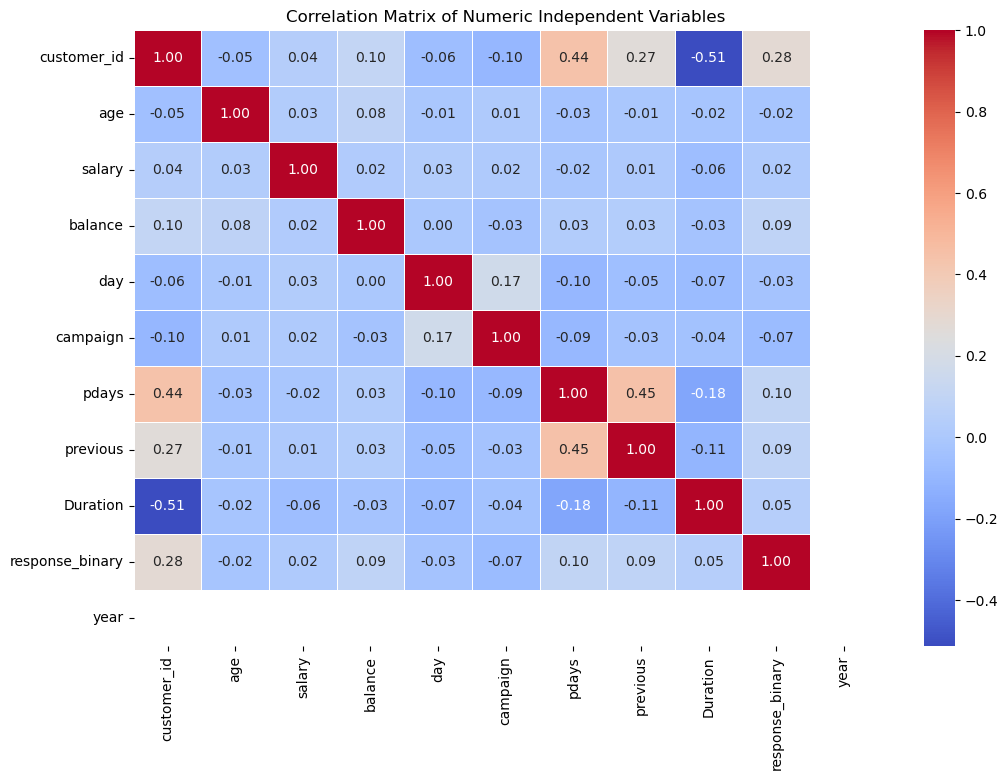

Correlation with Target Variable (response_binary):
 response_binary    1.000000
customer_id        0.281517
pdays              0.100476
previous           0.089138
balance            0.085411
Duration           0.047876
salary             0.016270
age               -0.019573
day               -0.032830
campaign          -0.070860
year                    NaN
Name: response_binary, dtype: float64


In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical features
correlation_matrix = numeric_df.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Independent Variables")
plt.show()

# Evaluate correlation with the target variable
target_corr = numeric_df.corr()['response_binary'].sort_values(ascending=False)
print("Correlation with Target Variable (response_binary):\n", target_corr)



# Evaluate how correlated features may influence the target variable

Correlation with Target Variable (response_binary):
 response_binary    1.000000
balance            0.085411
Duration           0.047876
salary             0.016270
age               -0.019573
campaign          -0.070860
Name: response_binary, dtype: float64


C:\Users\sagar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


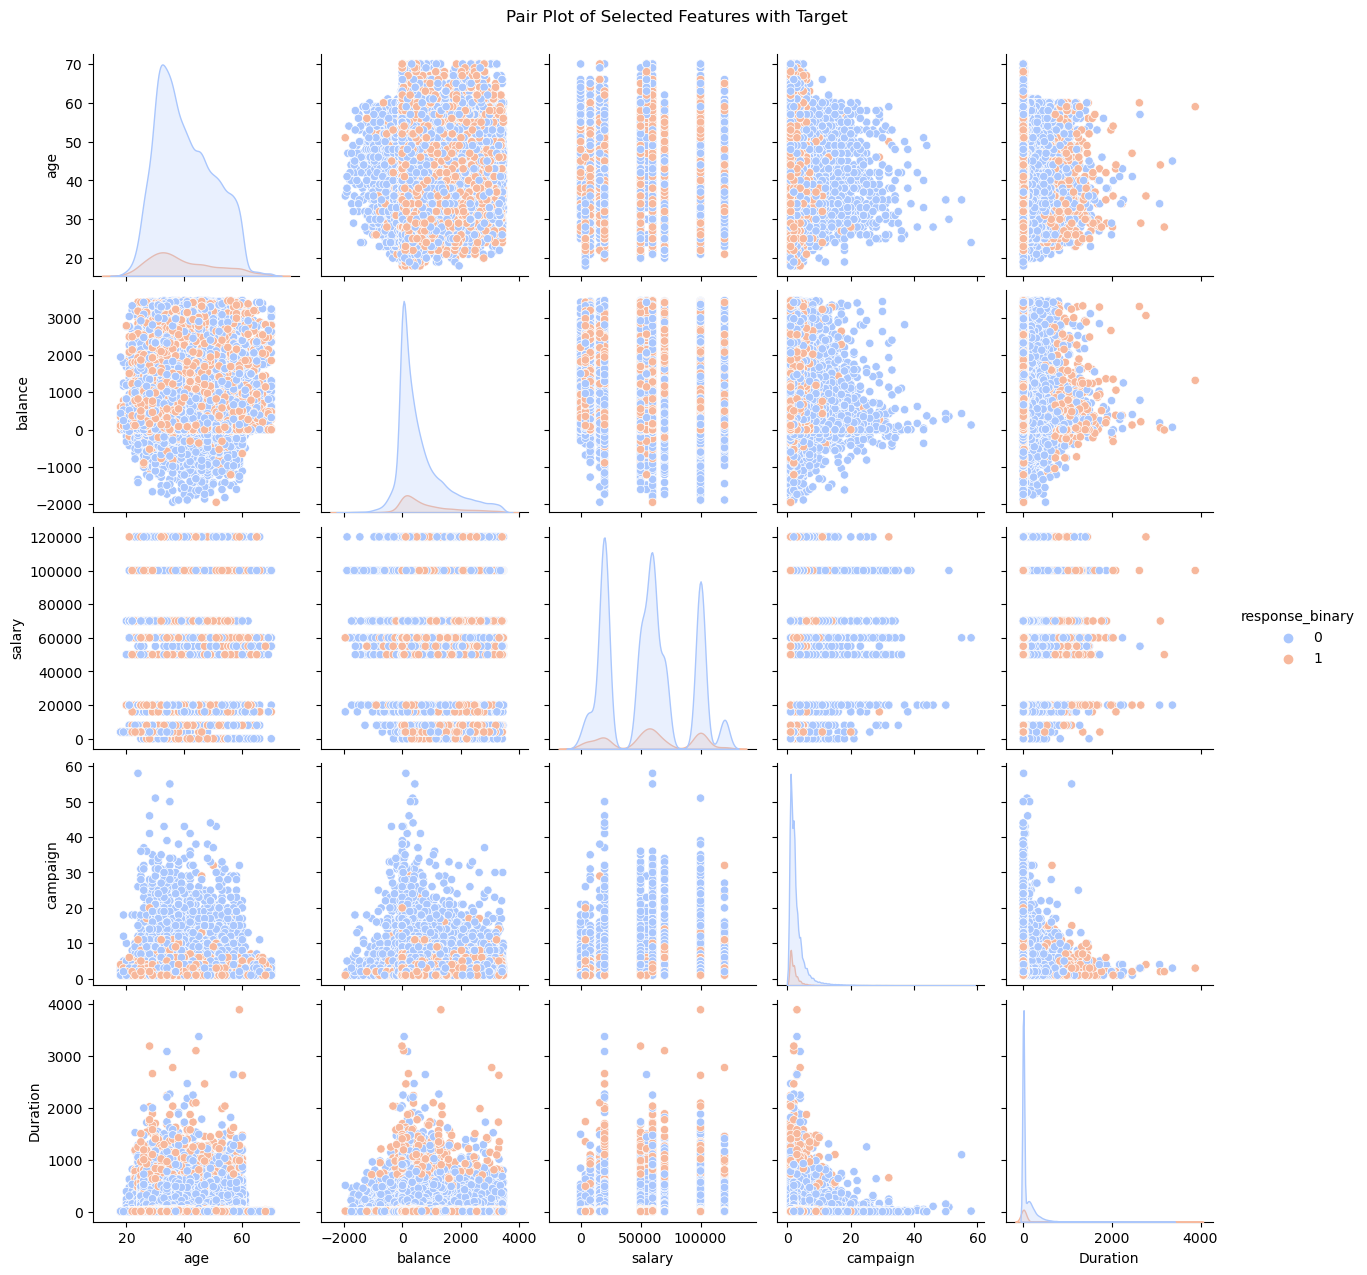

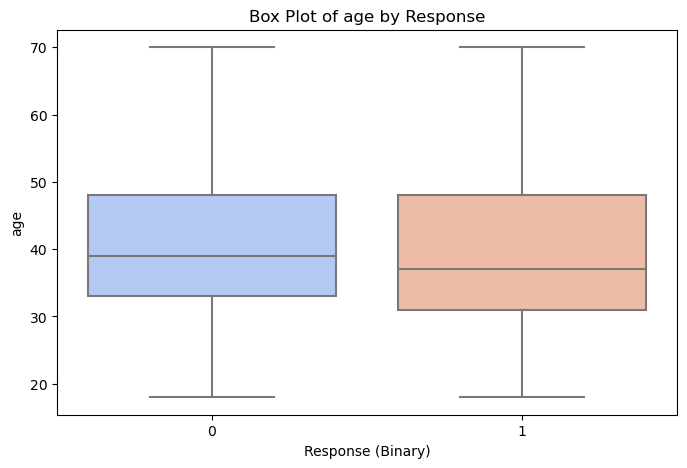

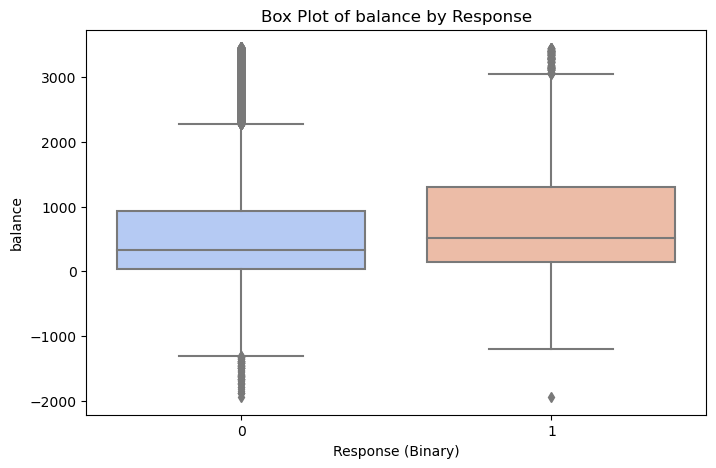

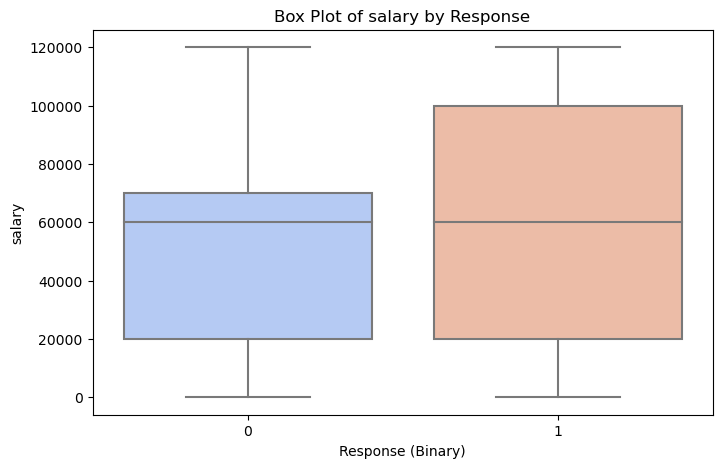

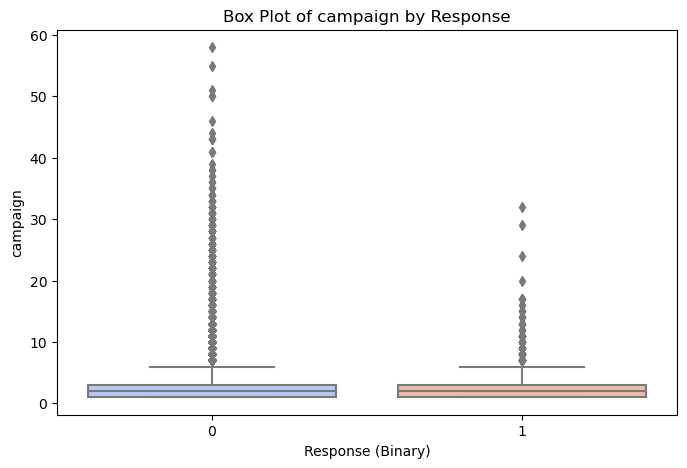

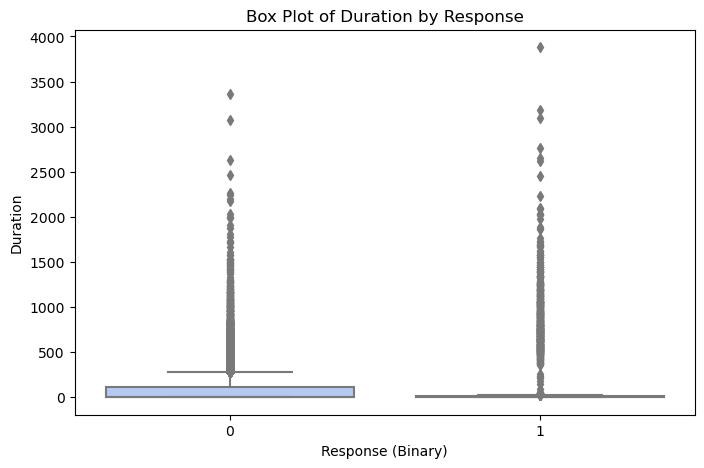

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select only relevant numeric columns (including the target variable)
# Adjust 'salary', 'balance', and 'Duration' as examples; include those most relevant based on previous correlation analysis
relevant_features = ['age', 'balance', 'salary', 'campaign', 'Duration', 'response_binary']
temp_df = df[relevant_features].copy()

# Correlation analysis for the relevant features and target
correlation_with_target = temp_df.corr()['response_binary'].sort_values(ascending=False)
print("Correlation with Target Variable (response_binary):\n", correlation_with_target)

# Visualization
# Pair plot to show relationships and influence on the target
sns.pairplot(temp_df, hue='response_binary', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features with Target', y=1.02)
plt.show()

# Box plots for individual features to inspect variance and influence on response
for feature in relevant_features[:-1]:  # Exclude the 'response_binary' column itself
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=temp_df, x='response_binary', y=feature, palette='coolwarm')
    plt.title(f'Box Plot of {feature} by Response')
    plt.xlabel('Response (Binary)')
    plt.ylabel(feature)
    plt.show()


# Identify and rectify outliers that could impact the analysis and predictions.

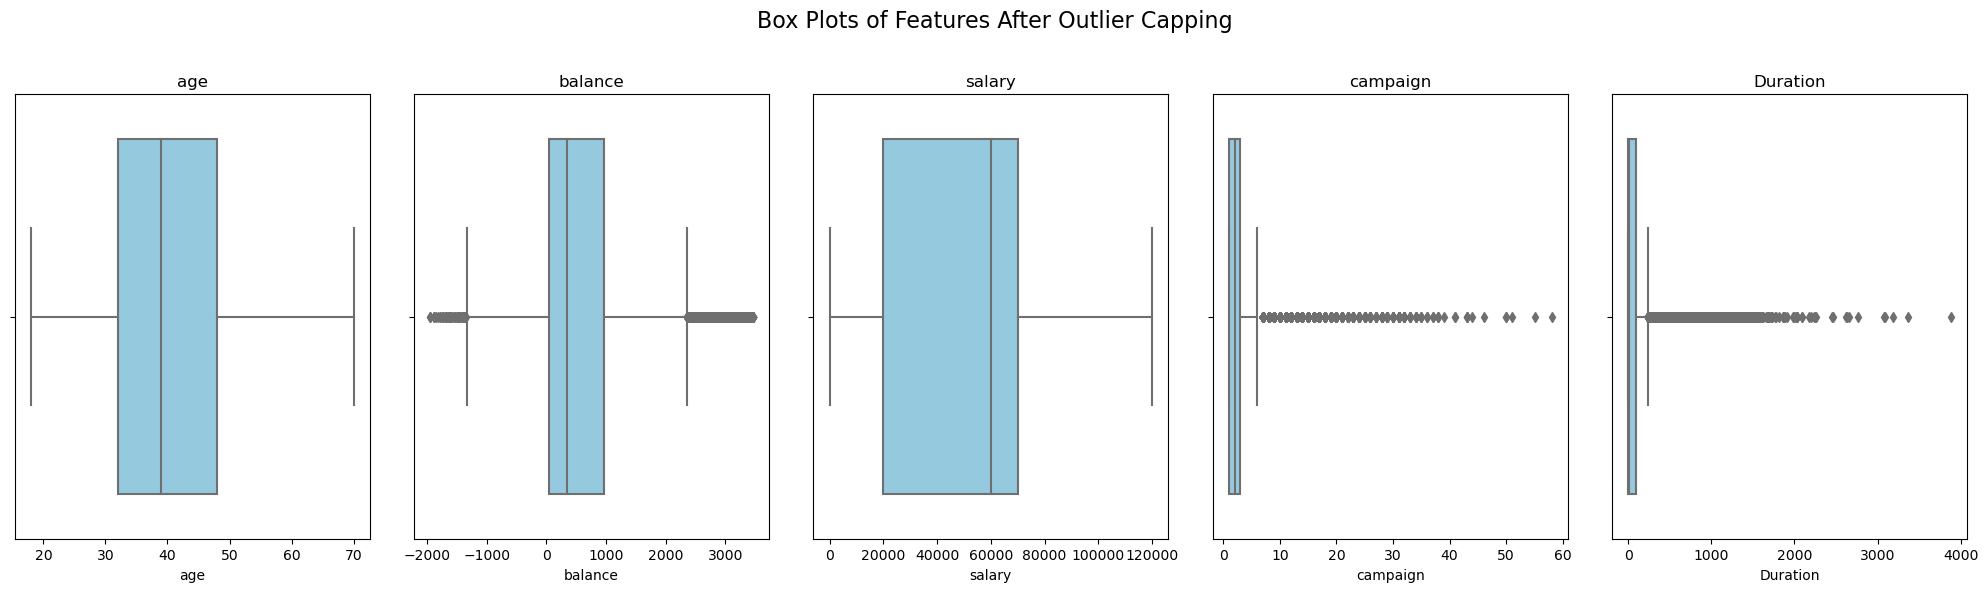

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of columns
outlier_columns = ['age', 'balance', 'salary', 'campaign', 'Duration']

# Create subplots
fig, axes = plt.subplots(1, len(outlier_columns), figsize=(20, 6))
fig.suptitle('Box Plots of Features After Outlier Capping', fontsize=16)

# Plot each column in a separate subplot
for i, column in enumerate(outlier_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(column)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [149]:
# Define a function to detect and print outliers using IQR
def detect_and_print_outliers(df, columns):
    outlier_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        # Save and print outliers
        outlier_dict[column] = outliers
        print(f"Outliers in {column}:\n", outliers[column].values)
        print(f"Total Outliers in {column}: {len(outliers)}\n{'-'*50}")

# List of columns to check for outliers
outlier_columns = ['age', 'balance', 'salary', 'campaign', 'Duration']

# Detect and print outliers
detect_and_print_outliers(df, outlier_columns)


Outliers in age:
 []
Total Outliers in age: 0
--------------------------------------------------
Outliers in balance:
 [2586 2476 3237 ... 2543 3409 2971]
Total Outliers in balance: 2543
--------------------------------------------------
Outliers in salary:
 []
Total Outliers in salary: 0
--------------------------------------------------
Outliers in campaign:
 [ 7  8  7 ...  9  9 12]
Total Outliers in campaign: 2757
--------------------------------------------------
Outliers in Duration:
 [261. 380. 517. ... 504. 249. 261.]
Total Outliers in Duration: 4627
--------------------------------------------------
